In [2]:
from google.colab import drive
drive. mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [6]:
%cd /content/drive/My Drive/Colab Notebooks/practice
!tar -xvf cifar-10-python.tar.gz

/content/drive/My Drive/Colab Notebooks/practice
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
def unpickle(file):
  import pickle
  with open(file, 'rb') as f:
    dict = pickle.load(f, encoding='bytes')
  return dict

def load_cifar10_data(data_dir):
  train_data = None
  train_labels = []
  
  for i in range(1,6):
    data_dic = unpickle(data_dir + "/data_batch_{}".format(i))
    if i == 1:
      train_data = data_dic['data']
    else:
      train_data = np.vstack([train_data, data_dic['data']])
    train_labels += data_dic['labels']  
    
  test_data_dic = unpickle(data_dir + "/test_batch")
  test_data = test_data_dic['data']
  test_labels = test_data_dic['labels']
  
  train_data = train_data.reshape(len(train_data),3,32,32)
  train_data = np.rollaxis(train_data,1,4)
  train_labels = np.array(train_labels)
  
  test_data = test_data.reshape(len(test_data),3,32,32)
  test_data = np.rollaxis(test_data,1,4)
  test_labels = np.array(text_labels)
  
  return train_data, train_labels, test_data, test_labels

In [29]:
%cd /content/drive/My Drive/Colab Notebooks/practice

/content/drive/My Drive/Colab Notebooks/practice


In [0]:
data_dir = 'cifar-10-batches-py'

train_data, train_labels, test_data, test_labels = load_cifar10_data(data_dir)

In [16]:
%cd cifar-10-batches-py/
!ls

[Errno 2] No such file or directory: 'cifar-10-batches-py/'
/content/drive/My Drive/Colab Notebooks/practice/cifar-10-batches-py
batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


In [0]:
file = data_batch_1

x = unpickle(file)
x

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

def unpickle(file):
  import pickle
  with open(file, 'rb')as fo:
    data = pickle.load(fo, encoding ='bytes')
  return data

def load_cifar_10_data(data_dir, negatives = False):
  meta_data_dict = unpickle(data_dir + "/batches.meta")
  cifar_label_names = meta_data_dict[b'label_names']
  cifar_label_names = np.array(cifar_label_names)
  
  cifar_train_data = None
  cifar_train_filenames = []
  cifar_train_labels = []
  
  for i in range(1,6):
    cifar_train_data_dict = unpickle(data_dir+"/data_batch_{}".format(i))
    if i == 1:
      cifar_train_data = cifar_train_data_dict[b'data']
    else:
      cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
    cifar_train_filenames += cifar_train_data_dict[b'filenames']
    cifar_train_labels += cifar_train_data_dict[b'labels']
    
  cifar_train_data = cifar_train_data.reshape((len(cifar_train_data),3,32,32))
  if negatives: 
    cifar_train_data = cifar_train_data.transpose(0,2,3,1).astype(np.float32)
  else:
     cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
  cifar_train_filenames = np.array(cifar_train_filenames)
  cifar_train_labels = np.array(cifar_train_labels)
    
  
  cifar_test_data_dict = unpickle(data_dir + "/test_batch")
  cifar_test_data = cifar_test_data_dict[b'data']
  cifar_test_filenames = cifar_test_data_dict[b'filenames']
  cifar_test_labels = cifar_test_data_dict[b'labels']

  cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
  if negatives:
    cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
  else:
    cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

  return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
     cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names

Train data:  (50000, 32, 32, 3)
Train filenames:  (50000,)
Train labels:  (50000,)
Test data:  (10000, 32, 32, 3)
Test filenames:  (10000,)
Test labels:  (10000,)
Label names:  (10,)


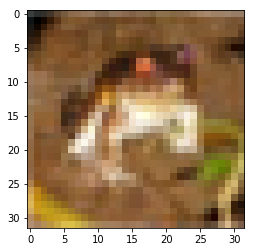

6


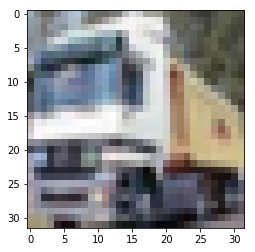

9


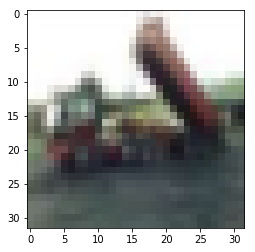

9


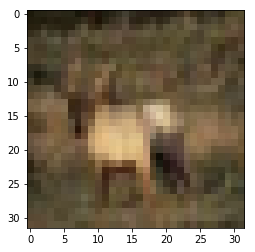

4


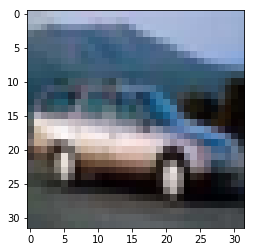

1


In [82]:
if __name__ == "__main__":
    """show it works"""

    cifar_10_dir = 'cifar-10-batches-py'

    train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
        load_cifar_10_data(cifar_10_dir)

    print("Train data: ", train_data.shape)
    print("Train filenames: ", train_filenames.shape)
    print("Train labels: ", train_labels.shape)
    print("Test data: ", test_data.shape)
    print("Test filenames: ", test_filenames.shape)
    print("Test labels: ", test_labels.shape)
    print("Label names: ", label_names.shape)

    # Don't forget that the label_names and filesnames are in binary and need conversion if used.

    # display some random training images in a 25x25 grid
    num_plot = 5
    #f, ax = plt.subplots(num_plot, num_plot)
    for m in range(num_plot):
    #    for n in range(num_plot):
            #idx = np.random.randint(0, train_data.shape[0])
            #ax[m, n].imshow(train_data[idx])
            #np.random.shuffle(train_data)
            #np.random.shuffle(train_labels)
            plt.imshow(train_data[m])
            plt.show()
            print(train_labels[m])
            #ax[m, n].get_xaxis().set_visible(False)
            #ax[m, n].get_yaxis().set_visible(False)        
    #f.subplots_adjust(hspace=0.1)
    #f.subplots_adjust(wspace=0)
    #plt.show()